# Train language model

In [1]:
from fastai.text import *

In [2]:
path = Path('/mnt/hdd1/data/jigsaw-unintended-bias-in-toxicity-classification')
# path = Path('/home/tony/Documents/jigsaw-unintended-bias-in-toxicity-classification')b

## Initialization

### Load csv

In [6]:
train_df = pd.read_csv(path/'train.csv')

In [7]:
valid_df = pd.read_csv(path/'test.csv')

### Look at the data

In [ ]:
train_df

### Using data bunch

In [6]:
# data_lm = TextDataBunch.from_df(path, train_df, valid_df, text_cols='comment_text')
data_lm = TextLMDataBunch.from_csv(path, 'train.csv', text_cols='comment_text')

In [7]:
data_lm.save(path/'language_model.pkl')

# Prepare to train

## Setup model

In [3]:
bs=32

In [4]:
data_lm = load_data(path, 'language_model.pkl', bs=bs)

### AWD_LSTM

In [5]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3).to_fp16()

### Transformer

In [5]:
learn = language_model_learner(data_lm, Transformer, drop_mult=0.3).to_fp16()

### TransformerXL

In [ ]:
learn = language_model_learner(data_lm, TransformerXL)

## Load data and save

In [6]:
learn = learn.load('transformer')

In [11]:
learn.save('transformer')

## Finding learning rate

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


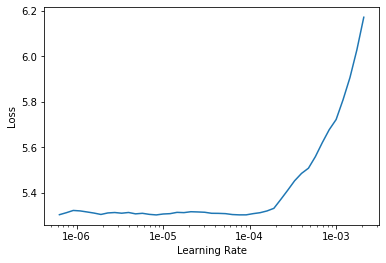

In [10]:
learn.recorder.plot(skip_end=15)

# Train

In [ ]:
learn.unfreeze()

In [8]:
learn.freeze_to(-3)

In [ ]:
learn.fit_one_cycle(2, 1e-5, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.168468,4.141176,0.288481,3:23:51


In [13]:
learn.save('fit-transformer')